# Housing Price Prediction – Full Visual Linear Regression Demo


This notebook visually explains:
- Linear regression on housing data
- Prediction errors
- Cost function contours
- 3D cost surface
- Overfitting vs underfitting
- Real CSV-based training
- Demo

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from ipywidgets import interact, FloatSlider
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("seaborn-v0_8")


## Generate Housing Data

In [4]:

np.random.seed(42)
X = np.random.rand(20,1) * 3
y = 100 * X.squeeze() + 50 + np.random.randn(20) * 15
print(X.shape)
print(y.shape)
print(X)
print(y)


(20, 1)
(20,)
[[1.12362036]
 [2.85214292]
 [2.19598183]
 [1.79597545]
 [0.46805592]
 [0.46798356]
 [0.17425084]
 [2.59852844]
 [1.80334504]
 [2.12421773]
 [0.06175348]
 [2.90972956]
 [2.49732792]
 [0.63701733]
 [0.5454749 ]
 [0.55021353]
 [0.91272673]
 [1.57426929]
 [1.29583506]
 [0.87368742]]
[147.16956885 339.92800191 255.97782141 208.41298974 118.79032367
  93.41171159  68.43800672 288.48162094 222.16876266 264.08561218
  38.91044463 346.60842592 290.72321189 109.32632696  95.52189098
 132.80552572 141.07021452 191.56126556 191.92167927 119.05608731]


## Housing Prices + Prediction Errors

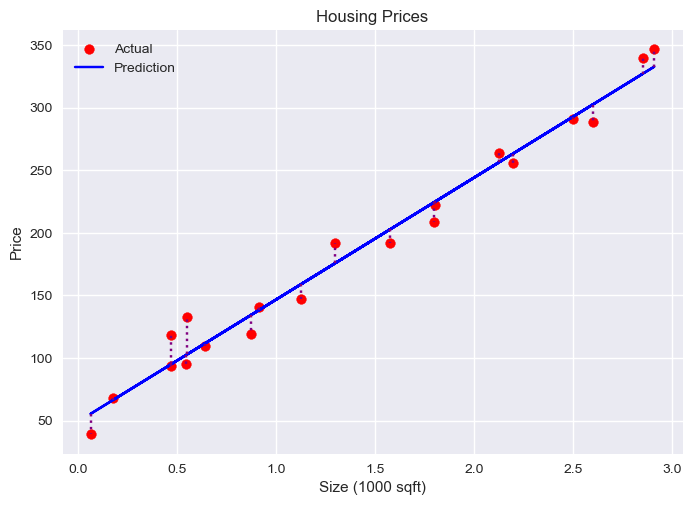

In [5]:

model = LinearRegression()
model.fit(X, y)

w_best = model.coef_[0]
b_best = model.intercept_
y_pred = w_best * X.squeeze() + b_best

plt.scatter(X, y, color='red', label='Actual')
plt.plot(X, y_pred, color='blue', label='Prediction')

for xi, yi, yp in zip(X.squeeze(), y, y_pred):
    plt.plot([xi, xi], [yp, yi], linestyle='dotted', color='purple')

plt.xlabel("Size (1000 sqft)")
plt.ylabel("Price")
plt.title("Housing Prices")
plt.legend()
plt.show()


## Cost Function

In [6]:

def cost_function(w, b):
    return np.mean((w*X.squeeze()+b - y)**2)


## Cost Function Contours

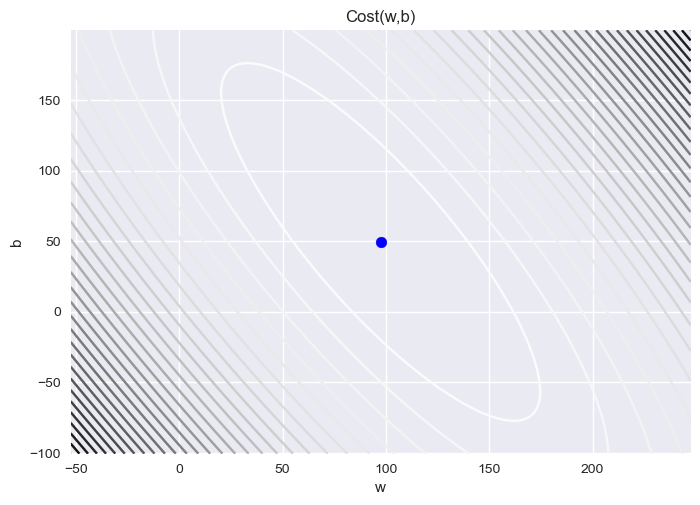

In [7]:

w_vals = np.linspace(w_best-150, w_best+150, 100)
b_vals = np.linspace(b_best-150, b_best+150, 100)
W, B = np.meshgrid(w_vals, b_vals)

J = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J[i,j] = cost_function(W[i,j], B[i,j])

plt.contour(W, B, J, levels=30)
plt.scatter(w_best, b_best, color='blue', s=60)
plt.xlabel("w")
plt.ylabel("b")
plt.title("Cost(w,b)")
plt.show()


## Interactive Cost Exploration

In [8]:

def explore_cost(w, b):
    plt.contour(W, B, J, levels=30)
    plt.scatter(w, b, color='red', s=60)
    plt.title(f"Cost = {cost_function(w,b):.0f}")
    plt.xlabel("w")
    plt.ylabel("b")
    plt.show()

interact(
    explore_cost,
    w=FloatSlider(min=w_vals.min(), max=w_vals.max(), step=5, value=w_best),
    b=FloatSlider(min=b_vals.min(), max=b_vals.max(), step=5, value=b_best)
)


interactive(children=(FloatSlider(value=97.41732633283826, description='w', max=247.41732633283826, min=-52.58…

<function __main__.explore_cost(w, b)>

## 3D Cost Surface

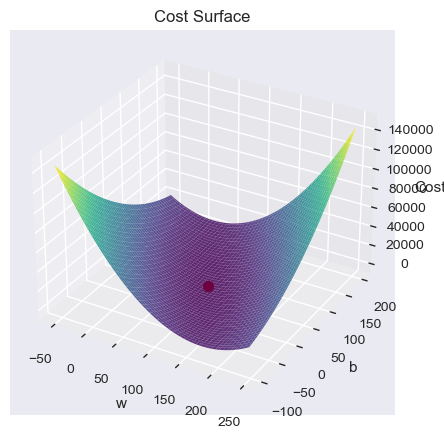

In [9]:

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, J, cmap='viridis', alpha=0.85)
ax.scatter(w_best, b_best, cost_function(w_best,b_best), color='red', s=60)
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("Cost")
ax.set_title("Cost Surface")
plt.show()


## Overfitting vs Underfitting

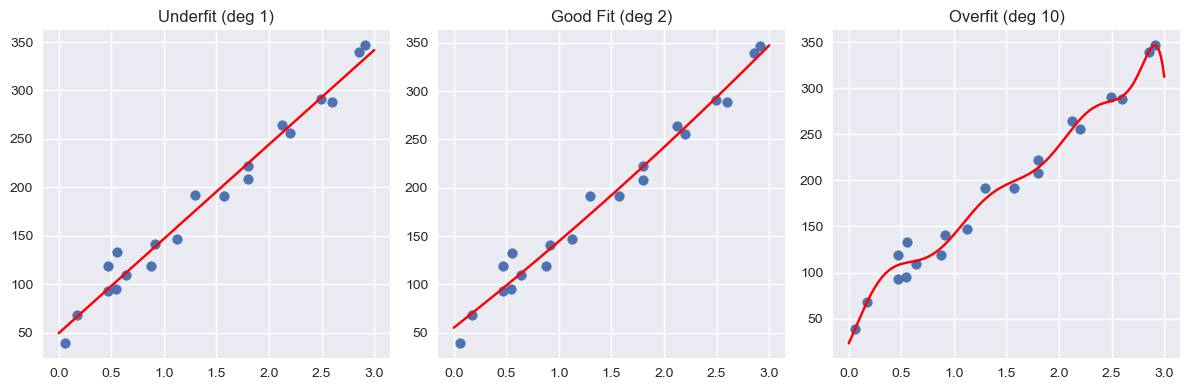

In [10]:

models = {
    "Underfit (deg 1)": make_pipeline(PolynomialFeatures(1), LinearRegression()),
    "Good Fit (deg 2)": make_pipeline(PolynomialFeatures(2), LinearRegression()),
    "Overfit (deg 10)": make_pipeline(PolynomialFeatures(10), LinearRegression())
}

Xp = np.linspace(0,3,200).reshape(-1,1)

plt.figure(figsize=(12,4))
for i,(name,m) in enumerate(models.items(),1):
    plt.subplot(1,3,i)
    m.fit(X,y)
    plt.scatter(X,y)
    plt.plot(Xp, m.predict(Xp), color='red')
    plt.title(name)
plt.tight_layout()
plt.show()


## Real Housing CSV

In [11]:

df = pd.DataFrame({
    'size_sqft':[800,900,1000,1100,1200,1300,1400,1500,1600,1700],
    'price':[350,380,420,460,500,540,590,630,680,720]
})
df.to_csv('house_prices.csv', index=False)
df


,size_sqft,price
0,800,350
1,900,380
2,1000,420
3,1100,460
4,1200,500
5,1300,540
6,1400,590
7,1500,630
8,1600,680
9,1700,720


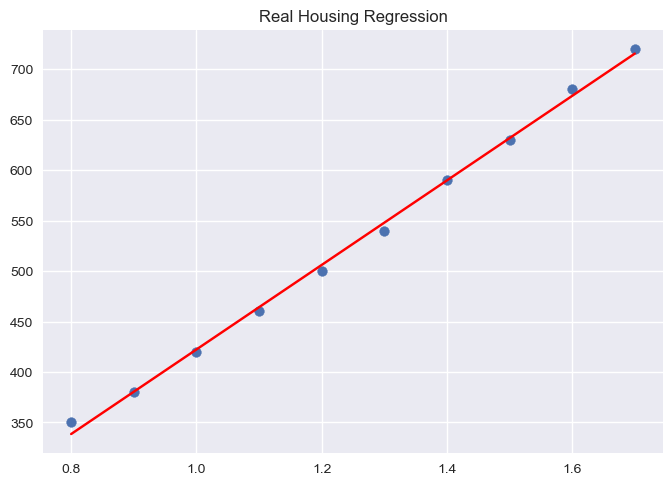

In [12]:

df = pd.read_csv('house_prices.csv')
Xr = df[['size_sqft']] / 1000
yr = df['price']

model = LinearRegression()
model.fit(Xr, yr)

plt.scatter(Xr, yr)
plt.plot(Xr, model.predict(Xr), color='red')
plt.title("Real Housing Regression")
plt.show()
